In [75]:
#import dependencies

import pandas as pd 
import seaborn as sns
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import sqlite3
import os
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.utils import resample




## ETL

In [76]:
# Read in the CSV file as a Pandas DataFrame
df = pd.read_csv(Path("resources/baseballData.csv"))

# Filtering out partial seasons
dfFullYear = df[~df['year'].isin([2020, 2024])]

# Get the number of columns before dropping unnecessary columns
num_columns_before_drop = dfFullYear.shape[1]

# Dropping unnecessary columns
dfFullYear.drop(columns=["player_id", 'k_percent', 'barrel', 'slg_percent',  'player_age', "last_name, first_name", 'year', 'ab', 'pa', 'hit', 'single', 'double', 'triple', 'out_zone_swing_miss', 'babip','bacon',
       'out_zone_swing', 'out_zone_percent', 'out_zone', 'in_zone_swing_miss', 'single', 'double', 'triple', 'home_run', 'strikeout', 'walk', 'bb_percent', 'on_base_percent', 'on_base_plus_slg', 'isolated_power','woba','wobacon',
       'in_zone_swing','batted_ball', 'groundballs', 'flyballs', 'linedrives', 'popups',
       'home_run', 'strikeout', 'walk'], inplace=True)

# Get the number of columns after dropping unnecessary columns
num_columns_after_drop = dfFullYear.shape[1]

# Print the number of columns before and after drop
print("Number of columns before drop:", num_columns_before_drop)
print("Number of columns after drop:", num_columns_after_drop)


Number of columns before drop: 65
Number of columns after drop: 30


/var/folders/q8/t_k5gtj11z5dpr8r51m6nbz00000gn/T/ipykernel_22680/3842697834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfFullYear.drop(columns=["player_id", 'k_percent', 'barrel', 'slg_percent',  'player_age', "last_name, first_name", 'year', 'ab', 'pa', 'hit', 'single', 'double', 'triple', 'out_zone_swing_miss', 'babip','bacon',


In [77]:
#dataframe info
dfFullYear.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1245
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   batting_avg             1104 non-null   float64
 1   exit_velocity_avg       1104 non-null   float64
 2   launch_angle_avg        1104 non-null   float64
 3   sweet_spot_percent      1104 non-null   float64
 4   barrel_batted_rate      1104 non-null   float64
 5   solidcontact_percent    1104 non-null   float64
 6   flareburner_percent     1104 non-null   float64
 7   poorlyunder_percent     1104 non-null   float64
 8   poorlytopped_percent    1104 non-null   float64
 9   poorlyweak_percent      1104 non-null   float64
 10  hard_hit_percent        1104 non-null   float64
 11  avg_best_speed          1104 non-null   float64
 12  avg_hyper_speed         1104 non-null   float64
 13  z_swing_percent         1104 non-null   float64
 14  z_swing_miss_percent    1104 non-null   float

In [78]:
dfFullYear.to_csv('Resources/Baseball_stats_cleaned.csv', index = False)

## SQL DB

In [79]:
# Step1. Load data file
df_cleaned = pd.read_csv('Resources/Baseball_stats_cleaned.csv')

In [80]:
df_cleaned.columns

Index(['batting_avg', 'exit_velocity_avg', 'launch_angle_avg',
       'sweet_spot_percent', 'barrel_batted_rate', 'solidcontact_percent',
       'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent',
       'poorlyweak_percent', 'hard_hit_percent', 'avg_best_speed',
       'avg_hyper_speed', 'z_swing_percent', 'z_swing_miss_percent',
       'oz_swing_percent', 'oz_swing_miss_percent', 'oz_contact_percent',
       'meatball_swing_percent', 'iz_contact_percent', 'whiff_percent',
       'swing_percent', 'pull_percent', 'straightaway_percent',
       'opposite_percent', 'f_strike_percent', 'groundballs_percent',
       'flyballs_percent', 'linedrives_percent', 'popups_percent'],
      dtype='object')

In [81]:
# Step2. Create/connect to SQLite DB.
connection = sqlite3.connect('stats.db')

In [82]:
# Step3. Load dataset to SQLite DB
df_cleaned.to_sql('baseball_stats', connection, if_exists = 'replace')

1104

In [83]:
#Scale the Data
scaler = StandardScaler()
scaler.fit(dfFullYear)

StandardScaler()

In [84]:
#Assign Variables to be Trained
y = df_cleaned["batting_avg"]
X = df_cleaned.drop(columns='batting_avg')

In [85]:
#Split the data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state = 50)


In [86]:
#Create a Rabndom Forest Regressor Model
rf_model = RandomForestRegressor(n_estimators=250, random_state=27)

In [87]:
#Train the Model
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=27)

In [88]:
#Make Predictions
predictions = rf_model.predict(X_test)
print(predictions)


[0.26428  0.276242 0.23792  0.287304 0.293082 0.266134 0.25802  0.279282
 0.24065  0.272614 0.29025  0.26334  0.27825  0.266032 0.276192 0.259054
 0.288626 0.272618 0.28791  0.26383  0.25295  0.27612  0.273584 0.254376
 0.23263  0.296454 0.24951  0.249816 0.246452 0.280432 0.28827  0.284008
 0.244524 0.27476  0.263002 0.263936 0.260478 0.24912  0.28724  0.256184
 0.268844 0.2535   0.251682 0.296498 0.272132 0.27118  0.265246 0.285904
 0.271084 0.256622 0.275508 0.273562 0.261562 0.22487  0.287706 0.27693
 0.269842 0.23858  0.254298 0.282412 0.273422 0.267792 0.271958 0.261534
 0.268262 0.296806 0.258724 0.24502  0.262224 0.268622 0.280024 0.244732
 0.255426 0.254144 0.263706 0.243862 0.277214 0.252592 0.26222  0.261956
 0.263714 0.255814 0.272226 0.268304 0.27093  0.25942  0.278374 0.268048
 0.275532 0.288598 0.289614 0.260244 0.269736 0.24769  0.275244 0.26832
 0.26019  0.273696 0.283926 0.258428 0.260968 0.244332 0.310848 0.295774
 0.267462 0.26329  0.252958 0.281718 0.277958 0.27390

In [89]:

#print absolute error
mean = mean_absolute_error(y_test, predictions)
print("Mean", mean)

Mean 0.016683321266968303


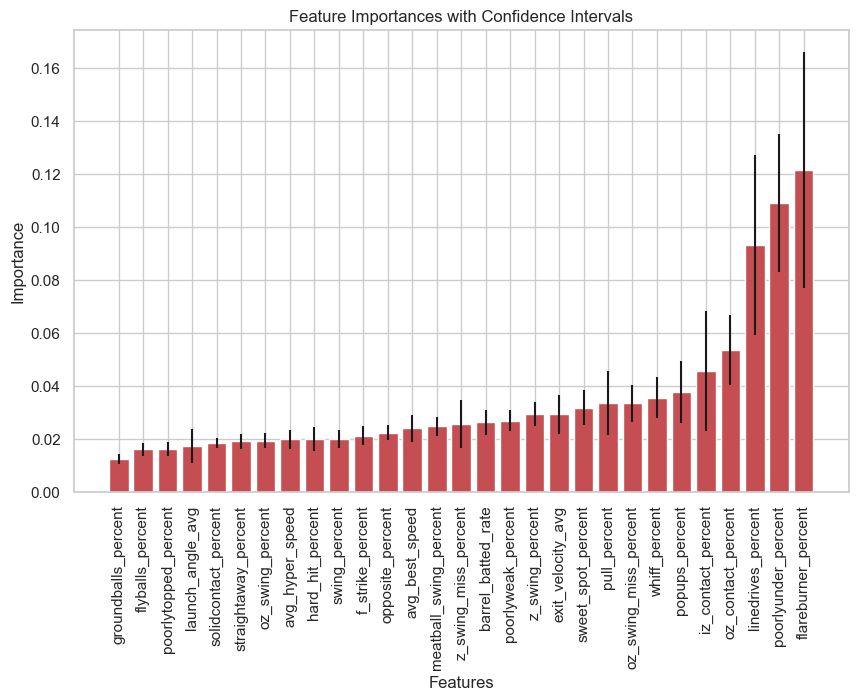

In [92]:


# Array to store feature importances
importances = np.zeros((50, X.shape[1]))
for i in range(50):
    # Bootstrap by sampling with replacement on the indices
    indices = resample(X.index, replace=True)
    X_boot, y_boot = X.loc[indices], y.loc[indices]
    #bootstrap model for confidence graph
    model = RandomForestRegressor(n_estimators=250, random_state=i)
    model.fit(X_boot, y_boot)
    #importances calculated
    importances[i] = model.feature_importances_
    #get mean and std for importances
mean_importances = np.mean(importances, axis=0)
std_importances = np.std(importances, axis=0)
sorted_idx = np.argsort(mean_importances)
#plot importances in graph
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), mean_importances[sorted_idx], color="r", yerr=std_importances[sorted_idx], align="center")
plt.xticks(range(X.shape[1]), [X.columns[idx] for idx in sorted_idx], rotation=90)
plt.title("Feature Importances with Confidence Intervals")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [94]:
X_test.columns


Index(['exit_velocity_avg', 'launch_angle_avg', 'sweet_spot_percent',
       'barrel_batted_rate', 'solidcontact_percent', 'flareburner_percent',
       'poorlyunder_percent', 'poorlytopped_percent', 'poorlyweak_percent',
       'hard_hit_percent', 'avg_best_speed', 'avg_hyper_speed',
       'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent',
       'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent',
       'iz_contact_percent', 'whiff_percent', 'swing_percent', 'pull_percent',
       'straightaway_percent', 'opposite_percent', 'f_strike_percent',
       'groundballs_percent', 'flyballs_percent', 'linedrives_percent',
       'popups_percent'],
      dtype='object')

In [95]:
# Close SQL connection
connection.close()

In [96]:
from joblib import dump, load
dump(rf_model, 'baseball_stats.joblib')

['baseball_stats.joblib']

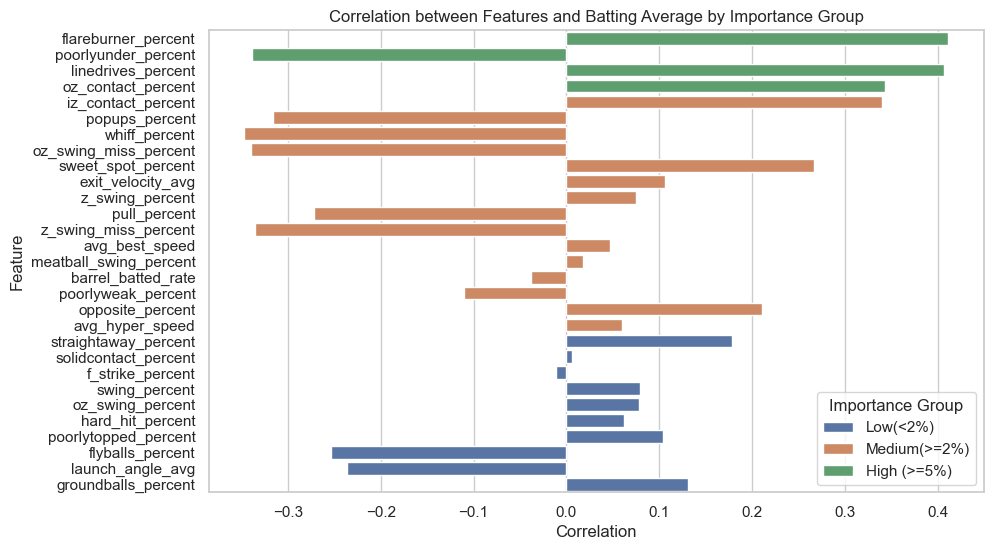

,Importance,Feature,Correlation,Importance Group
0,0.124681,flareburner_percent,0.411419,High (>=5%)
1,0.109668,poorlyunder_percent,-0.338879,High (>=5%)
2,0.088149,linedrives_percent,0.406422,High (>=5%)
3,0.065006,oz_contact_percent,0.342973,High (>=5%)
4,0.044114,iz_contact_percent,0.339751,Medium(>=2%)
5,0.040641,popups_percent,-0.316008,Medium(>=2%)
6,0.037822,whiff_percent,-0.347536,Medium(>=2%)
7,0.033993,oz_swing_miss_percent,-0.339474,Medium(>=2%)
8,0.032733,sweet_spot_percent,0.267097,Medium(>=2%)
9,0.031508,exit_velocity_avg,0.106211,Medium(>=2%)


In [98]:

# Convert the feature importances into a DataFrame
df_importance = pd.DataFrame(feature_importances, columns=['Importance', 'Feature'])

# Calculate correlations between features and batting average
correlations = {}
for feature in df_importance['Feature']:
    correlation = df[[feature, 'batting_avg']].corr().iloc[0, 1]
    correlations[feature] = correlation

# Convert correlations into a DataFrame
df_correlations = pd.DataFrame(correlations.items(), columns=['Feature', 'Correlation'])

# Merge feature importance and correlation DataFrames
df_merged = df_importance.merge(df_correlations, on='Feature')

# Define thresholds for categorizing importance
high_importance_threshold = 0.05
low_importance_threshold = 0.02

# Group features based on importance
df_merged['Importance Group'] = pd.cut(df_merged['Importance'],
                                       bins=[-np.inf, low_importance_threshold, high_importance_threshold, np.inf],
                                       labels=['Low(<2%)', 'Medium(>=2%)', 'High (>=5%)'])

# Plot
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', hue='Importance Group', data=df_merged)
plt.title('Correlation between Features and Batting Average by Importance Group')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.legend(title='Importance Group')

# Save the output image to the Resources folder
output_path = 'Resources/correlation_feature_importance.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()
df_merged

In [100]:
#some summary statistics and also sum showing total importance disparity
df_merged["Importance"].var()
df_merged["Importance"].mean()
df_merged["Importance"].std()
df_merged.iloc[0:5, 0].sum()

0.4316186556956426

In [101]:
#categorizing statistics by stat types
df_merged.head(45)
df_merged['stat_type'] = None
features_to_update = ['sweet_spot_percent', 'flareburner_percent', 'poorlyunder_percent', 'poorlytopped_percent', 'launch_angle_avg']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'launch angle'
features_to_update = ['groundballs_percent', 'flyballs_percent', 'linedrives_percent', 'popups_percent']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'ball outcome'
features_to_update = ['k_percent', 'whiff_percent' , 'swing_percent', 'f_strike_percent', 'z_swing_percent', 'z_swing_miss_percent', 'oz_swing_percent', 'iz_contact_percent', 'oz_swing_miss_percent', 'oz_contact_percent', 'meatball_swing_percent']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'swing behavior'
features_to_update = ['exit_velocity_avg', 'barrel_batted_rate', 'swing_percent', 'hard_hit_percent','solidcontact_percent','avg_best_speed', 'avg_hyper_speed']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'ball speed'
features_to_update = ['pull_percent', 'straightaway_percent', 'opposite_percent', 'poorlyweak_percent']
df_merged.loc[df_merged['Feature'].isin(features_to_update), 'stat_type'] = 'field placement'
df_merged.head(45)

,Importance,Feature,Correlation,Importance Group,stat_type
0,0.124681,flareburner_percent,0.411419,High (>=5%),launch angle
1,0.109668,poorlyunder_percent,-0.338879,High (>=5%),launch angle
2,0.088149,linedrives_percent,0.406422,High (>=5%),ball outcome
3,0.065006,oz_contact_percent,0.342973,High (>=5%),swing behavior
4,0.044114,iz_contact_percent,0.339751,Medium(>=2%),swing behavior
5,0.040641,popups_percent,-0.316008,Medium(>=2%),ball outcome
6,0.037822,whiff_percent,-0.347536,Medium(>=2%),swing behavior
7,0.033993,oz_swing_miss_percent,-0.339474,Medium(>=2%),swing behavior
8,0.032733,sweet_spot_percent,0.267097,Medium(>=2%),launch angle
9,0.031508,exit_velocity_avg,0.106211,Medium(>=2%),ball speed


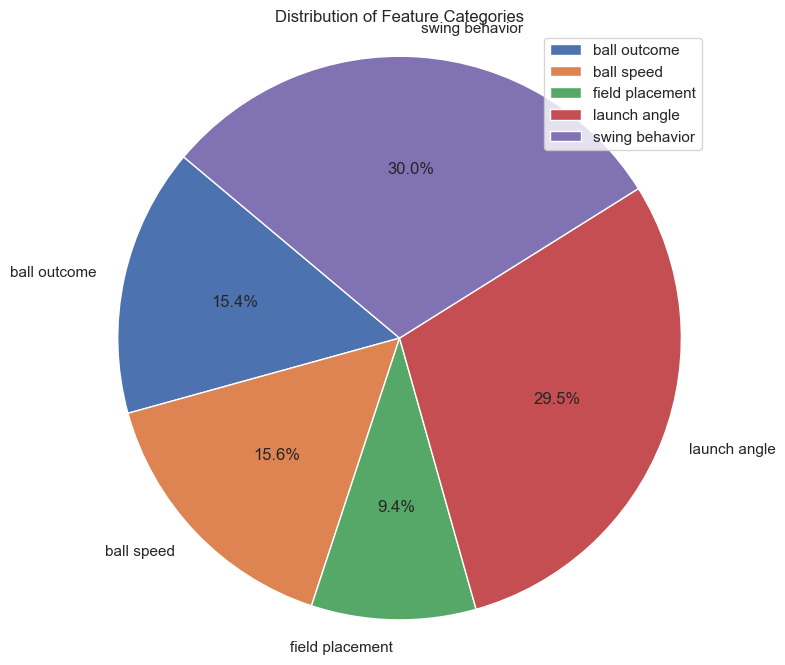

In [102]:
# Count the number of features for each stat type
stat_type_counts = df_merged.groupby("stat_type")["Importance"].sum()

# Plot pie chart of importances by stat type
plt.figure(figsize=(8, 8))
plt.pie(stat_type_counts, labels=stat_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Feature Categories')
plt.axis('equal')

# Add legend
plt.legend(loc='upper right')

plt.show()


In [103]:
#print absolute error
mean = mean_absolute_error(y_test, predictions)
print("Mean", mean)


Mean 0.016683321266968303
